<a href="https://colab.research.google.com/github/Mrmesmerized/Toxic-Word-Detection-Project/blob/main/notebooks/Toxic_word_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title
# Install gdown to download files from Google Drive
!pip install gdown

# Download the dataset from Google Drive using the file ID
import gdown

file_id = '1RbAtx5t7x7Com2sjEG6bLrXYJy3LI0vA'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'twitter_data.csv'
gdown.download(url, output, quiet=False)

# Load the dataset
import pandas as pd

df = pd.read_csv('twitter_data.csv')

# Display the first few rows of the dataset
df.head()

Downloading...
From: https://drive.google.com/uc?id=1RbAtx5t7x7Com2sjEG6bLrXYJy3LI0vA
To: /content/twitter_data.csv
100%|██████████| 2.55M/2.55M [00:00<00:00, 56.0MB/s]


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [2]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import re
import nltk
nltk.download('stopwords')
from nltk.util import pr
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Load the data
df = pd.read_csv('/content/twitter_data.csv')
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [4]:
# Map the 'class' column to 'labels'
df['labels'] = df['class'].map({0: "Hate Speech Detected", 1: "Offensive language detected", 2: "No hate and offensive speech"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  No hate and offensive speech  
1   Offensive language detected  
2   Offensive language detected  
3   Offensive language detected  
4   Offensive language detected  


In [5]:
if 'class' not in df.columns:
    raise KeyError("The 'class' column does not exist in the DataFrame.")

# Retain a copy of the 'class' column for later filtering
class_column = df['class'].copy()

# Select relevant columns
df = df[['tweet', 'labels', 'class']]  # Keep 'class' for filtering later
print(df.head())

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  class  
0  No hate and offensive speech      2  
1   Offensive language detected      1  
2   Offensive language detected      1  
3   Offensive language detected      1  
4   Offensive language detected      1  


In [6]:
# Clean the text data
def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = [word for word in text.split() if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split()]
    text = " ".join(text)
    return text

df["tweet"] = df["tweet"].apply(clean)
print(df.head())

                                               tweet  \
0  rt mayasolov woman shouldnt complain clean hou...   
1   rt boy dat coldtyga dwn bad cuffin dat hoe place   
2  rt urkindofbrand dawg rt ever fuck bitch start...   
3             rt cganderson vivabas look like tranni   
4  rt shenikarobert shit hear might true might fa...   

                         labels  class  
0  No hate and offensive speech      2  
1   Offensive language detected      1  
2   Offensive language detected      1  
3   Offensive language detected      1  
4   Offensive language detected      1  


In [7]:
# Drop rows with missing values
df = df.dropna(subset=['tweet', 'labels'])

In [8]:
# Convert the text data to arrays
x = np.array(df["tweet"])
y = np.array(df["class"])  # Use 'class' column for training

# Vectorize the text data
cv = CountVectorizer()
x_cv = cv.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_cv, y, test_size=0.3, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# Filter the original DataFrame by class column
hate = df[class_column == 0]
offensive = df[class_column == 1]
neither = df[class_column == 2]

print(hate.head())
print(offensive.head())
print(neither.head())

                                                 tweet                labels  \
85                          whalelookyher queer gaywad  Hate Speech Detected   
89   whitethunduh alsarabsss hes beaner smh tell he...  Hate Speech Detected   
110  devilgrimz vigxrart your fuck gay blacklist ho...  Hate Speech Detected   
184  markroundtreejr lmfaoooo hate black peopl ther...  Hate Speech Detected   
202                   nochillpaz least im nigger lmfao  Hate Speech Detected   

     class  
85       0  
89       0  
110      0  
184      0  
202      0  
                                               tweet  \
1   rt boy dat coldtyga dwn bad cuffin dat hoe place   
2  rt urkindofbrand dawg rt ever fuck bitch start...   
3             rt cganderson vivabas look like tranni   
4  rt shenikarobert shit hear might true might fa...   
5  tmadisonx shit blow meclaim faith somebodi sti...   

                        labels  class  
1  Offensive language detected      1  
2  Offensive language de

In [10]:
print(hate.shape)
print(offensive.shape)
print(neither.shape)

(1430, 3)
(19190, 3)
(4163, 3)


In [11]:
'''
Under-sampling to build a sample dataset containing similar distribution of hate,
offensive, and neither hate nor offensive speech
'''

offensive_sample = offensive.sample(n = 1430, random_state=42)
neither_sample = neither.sample(n = 1430, random_state=42)

new_dataset = pd.concat([offensive_sample, neither_sample, hate], axis = 0)

new_dataset.head()

,tweet,labels,class
22889,everytim go cracker barrel girl great tit seat...,Offensive language detected,1
20565,run nigga dont want nigga need bad bitch that ...,Offensive language detected,1
10780,need girl jamaica cant fuck basic black bitch,Offensive language detected,1
17261,rt shadowbeatzinc know block next week bitch,Offensive language detected,1
13954,put ya hand grade bitch,Offensive language detected,1


In [12]:
new_dataset.tail()

,tweet,labels,class
24576,guy biggest faggot omfg,Hate Speech Detected,0
24685,one name offens kike wop kraut wetback jigaboo...,Hate Speech Detected,0
24751,pussi ass nigga know nigga,Hate Speech Detected,0
24776,your nigger,Hate Speech Detected,0
24777,your retard hope get type diabet die sugar rus...,Hate Speech Detected,0


In [13]:
# Generate predictions on the test set
y_pred = clf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=["Hate Speech Detected", "Offensive language detected", "No hate and offensive speech"])

print("Classification Report:")
print(report)

Classification Report:
                              precision    recall  f1-score   support

        Hate Speech Detected       0.32      0.34      0.33       427
 Offensive language detected       0.92      0.93      0.92      5747
No hate and offensive speech       0.82      0.77      0.79      1261

                    accuracy                           0.87      7435
                   macro avg       0.68      0.68      0.68      7435
                weighted avg       0.87      0.87      0.87      7435



# Enter text below and click 'Detect' to check for toxicity

In [14]:
# Define the labels mapping
labels_mapping = {0: "Hate Speech Detected", 1: "Offensive language detected", 2: "No hate and offensive speech"}

# Create the text box widget with increased width
text_box = widgets.Textarea(
    value='',
    placeholder='Type your text here...',
    description='Text:',
    disabled=False,
    layout=widgets.Layout(width='80%')  # Set the width to 80% of the available space
)

# Create the button widget with vertical alignment
button = widgets.Button(
    description='Detect',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to detect',
    icon='check',
    layout=widgets.Layout(margin='20px 30px 30px 60px')  # Adjust the margin to align vertically
)

output = widgets.Output()

def on_button_click(b):
    with output:
        try:
            output.clear_output()
            input_text = text_box.value
            cleaned_text = clean(input_text)
            input_vec = cv.transform([cleaned_text])
            prediction = clf.predict(input_vec)[0]
            result = labels_mapping[prediction]
            print("Detection:", result)
        except Exception as e:
            print(f"Error: {e}")

button.on_click(on_button_click)

# Align the button and text box vertically
vbox = widgets.VBox([text_box, button])

display(vbox, output)

Output()

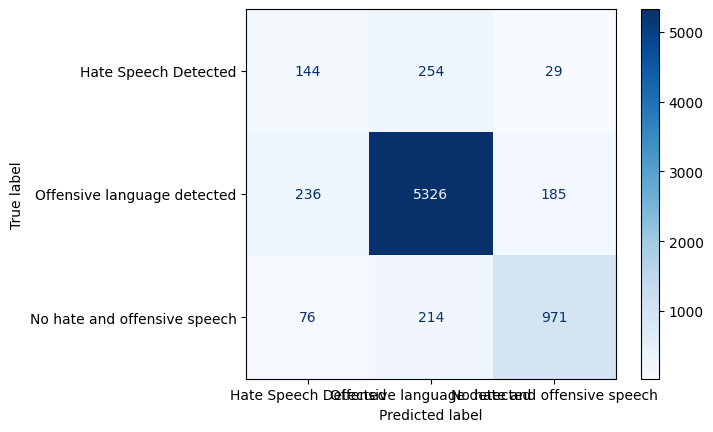

In [15]:
# Generate and display the confusion matrix
def plot_confusion_matrix():
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Hate Speech Detected", "Offensive language detected", "No hate and offensive speech"])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

plot_confusion_matrix()